In [4]:

!pip install pandas
!pip install numpy
!pip install matplotlib


### Generating Synthesis data

In [25]:
import pandas as pd
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Number of samples
N = 2000

# Generate synthetic sensor features
temp = np.random.normal(loc=75, scale=10, size=N)          # Temperature in °C
vibration = np.random.normal(loc=0.5, scale=0.2, size=N)   # Vibration amplitude
pressure = np.random.normal(loc=30, scale=5, size=N)       # Pressure in bar

# Create failure label based on some conditions (nonlinear relationship)
# Machines with high temperature, high vibration, and low pressure are more likely to fail
failure_prob = (
    0.3 * (temp > 85).astype(int)
    + 0.4 * (vibration > 0.7).astype(int)
    + 0.3 * (pressure < 25).astype(int)
    + np.random.rand(N) * 0.2  # random noise
)

failure = (failure_prob > 0.5).astype(int)

# Combine into DataFrame
data = pd.DataFrame({
    "temp": temp,
    "vibration": vibration,
    "pressure": pressure,
    "failure": failure
})

# Save to CSV
data.to_csv("sensor_data.csv", index=False)
print("✅ Synthetic dataset saved as sensor_data.csv")
print(data.head())


✅ Synthetic dataset saved as sensor_data.csv
        temp  vibration   pressure  failure
0  79.967142   0.364964  25.682532        0
1  73.617357   0.471096  29.843983        0
2  81.476885   0.341516  30.090084        0
3  90.230299   0.438408  32.363152        0
4  72.658466   0.121277  23.165708        0


## Importing libaries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Reading the dataset

In [26]:
md = pd.read_csv('sensor_data.csv')
md.head()

,temp,vibration,pressure,failure
0,79.967142,0.364964,25.682532,0
1,73.617357,0.471096,29.843983,0
2,81.476885,0.341516,30.090084,0
3,90.230299,0.438408,32.363152,0
4,72.658466,0.121277,23.165708,0


In [27]:
md.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   temp       2000 non-null   float64
 1   vibration  2000 non-null   float64
 2   pressure   2000 non-null   float64
 3   failure    2000 non-null   int64  
dtypes: float64(3), int64(1)
memory usage: 62.6 KB


In [28]:
md.describe()

,temp,vibration,pressure,failure
count,2000.000000,2000.000000,2000.000000,2000.000000
mean,75.450841,0.498711,29.759972,0.126000
std,9.884657,0.201071,4.998318,0.331932
min,42.587327,-0.103902,14.116481,0.000000
25%,68.773381,0.358175,26.566050,0.000000
50%,75.446917,0.499989,29.848950,0.000000
75%,81.829776,0.633109,33.144091,0.000000
max,113.527315,1.285248,45.564551,1.000000


### Checking null values


In [29]:
md.isnull().sum()

temp         0
vibration    0
pressure     0
failure      0
dtype: int64

### Finding the correlationg between the features

In [30]:
corr_columns = md.corr()
print(corr_columns)

               temp  vibration  pressure   failure
temp       1.000000  -0.017783 -0.004027  0.165929
vibration -0.017783   1.000000  0.035827  0.449952
pressure  -0.004027   0.035827  1.000000 -0.115786
failure    0.165929   0.449952 -0.115786  1.000000


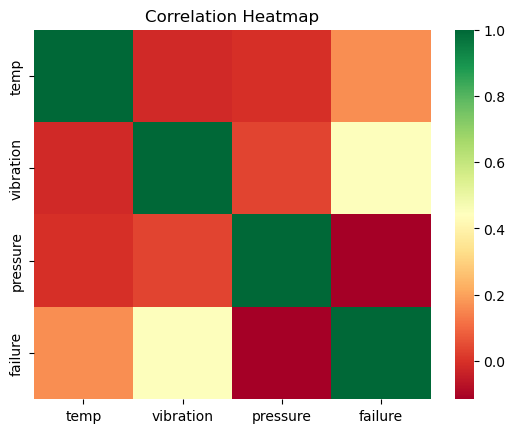

In [31]:
sn.heatmap(corr_columns, cmap='RdYlGn', xticklabels=corr_columns.columns, yticklabels=corr_columns.columns)
plt.title('Correlation Heatmap')
plt.show()